**PROJECT: RAINFALL PREDICTION ON WEATHER DATASET**

**IMPORTING NEEDED LIBRARIES**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**UPLOADING THE DATASET**

In [ ]:
# Uploading The Dataset
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


**DATA PREPROCESSING**

In [ ]:
# Finding the Statistical Measures of the Dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
# Checking the Dimention of the Dataset
df.shape

(142193, 24)

In [ ]:
# Checking the Data type of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# Dropping the Less Important Features from the Dataset
df = df.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Location", "Date"], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [ ]:
# Removing rows from the Dataset that contains missing values (NaN).
df = df.dropna(axis = 0)
df.shape

(112925, 18)

In [ ]:
# Printing All the Columns from the Dataset
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**LABEL ENCODING**

In [ ]:
# Using Label Encoding to change the Categorical Values to Numerical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["WindGustDir"] = le.fit_transform(df["WindGustDir"])
df["WindDir9am"] = le.fit_transform(df["WindDir9am"])
df["WindDir3pm"] = le.fit_transform(df["WindDir3pm"])
df["RainToday"] = le.fit_transform(df["RainToday"])
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])

In [ ]:
# Dropping the column "RainTomorrow" from the Dataset and storing that to new variable called "Y"
X = df.drop(['RainTomorrow'], axis = 1)
Y = df['RainTomorrow']

In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2


**DATA STANDARDIZATION**

In [ ]:
#This Method Computes the Mean and Standard Deviation of each feature in 'X' and then
# Performs Standardization by Centering and Scaling the features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.11756741, -0.10822071, -0.20666127, ..., -0.04787026,
        -0.53828059, -0.27310246],
       [-0.84180219,  0.20684494, -0.27640495, ...,  0.31776848,
        -0.53828059, -0.27310246],
       [ 0.03761995,  0.29277194, -0.27640495, ...,  0.15688743,
        -0.53828059, -0.27310246],
       ...,
       [-1.44940294,  0.23548728, -0.27640495, ...,  0.34701958,
        -0.53828059, -0.27310246],
       [-1.16159206,  0.46462594, -0.27640495, ...,  0.58102838,
        -0.53828059, -0.27310246],
       [-0.77784422,  0.4789471 , -0.27640495, ...,  0.56640283,
        -0.53828059, -0.27310246]])

In [ ]:
standardized_data = X
X = standardized_data
Y = df['RainTomorrow']

In [ ]:
print(X)
print(Y)

        MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0          13.4     22.9       0.6           13           44.0          13   
1           7.4     25.1       0.0           14           44.0           6   
2          12.9     25.7       0.0           15           46.0          13   
3           9.2     28.0       0.0            4           24.0           9   
4          17.5     32.3       1.0           13           41.0           1   
...         ...      ...       ...          ...            ...         ...   
142188      3.5     21.8       0.0            0           31.0           2   
142189      2.8     23.4       0.0            0           31.0           9   
142190      3.6     25.3       0.0            6           22.0           9   
142191      5.4     26.9       0.0            3           37.0           9   
142192      7.8     27.0       0.0            9           28.0          10   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Hu

**DATA VISUALIZATION**

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

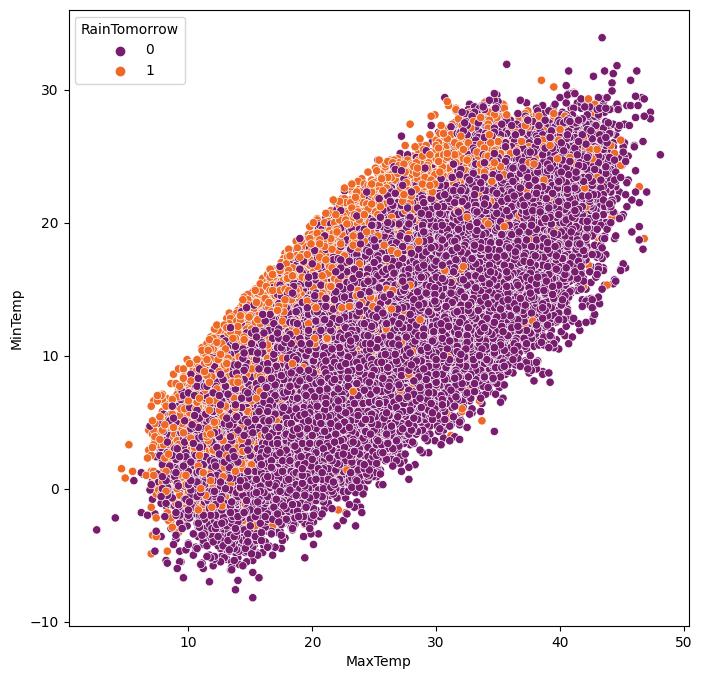

In [ ]:
# Displaying the prediction, whether it will rain tomorrow or not through Scatter Plot, considering "MaxTemp" and "MinTemp".
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

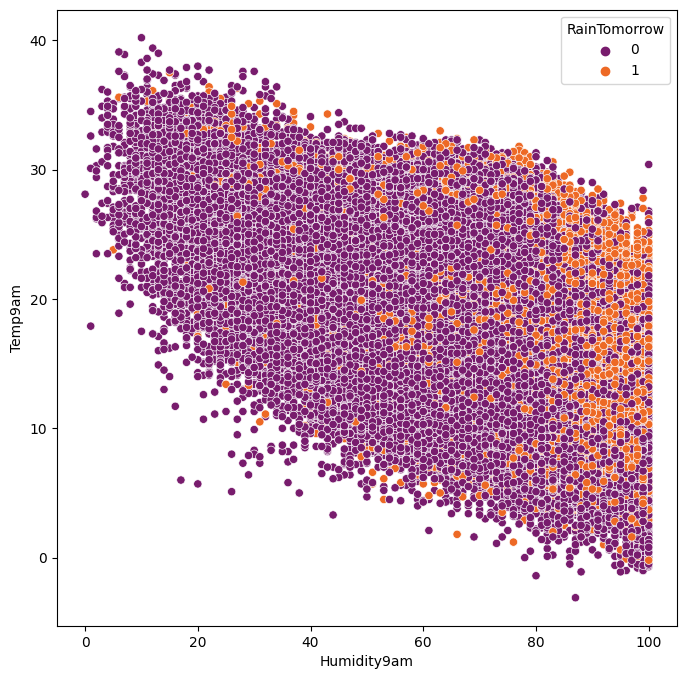

In [ ]:
# Displaying the prediction, whether it will rain tomorrow or not through Scatter Plot, considering "Humidity9am" and "Temp9am".
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'inferno', data = df)

**HEATMAP**

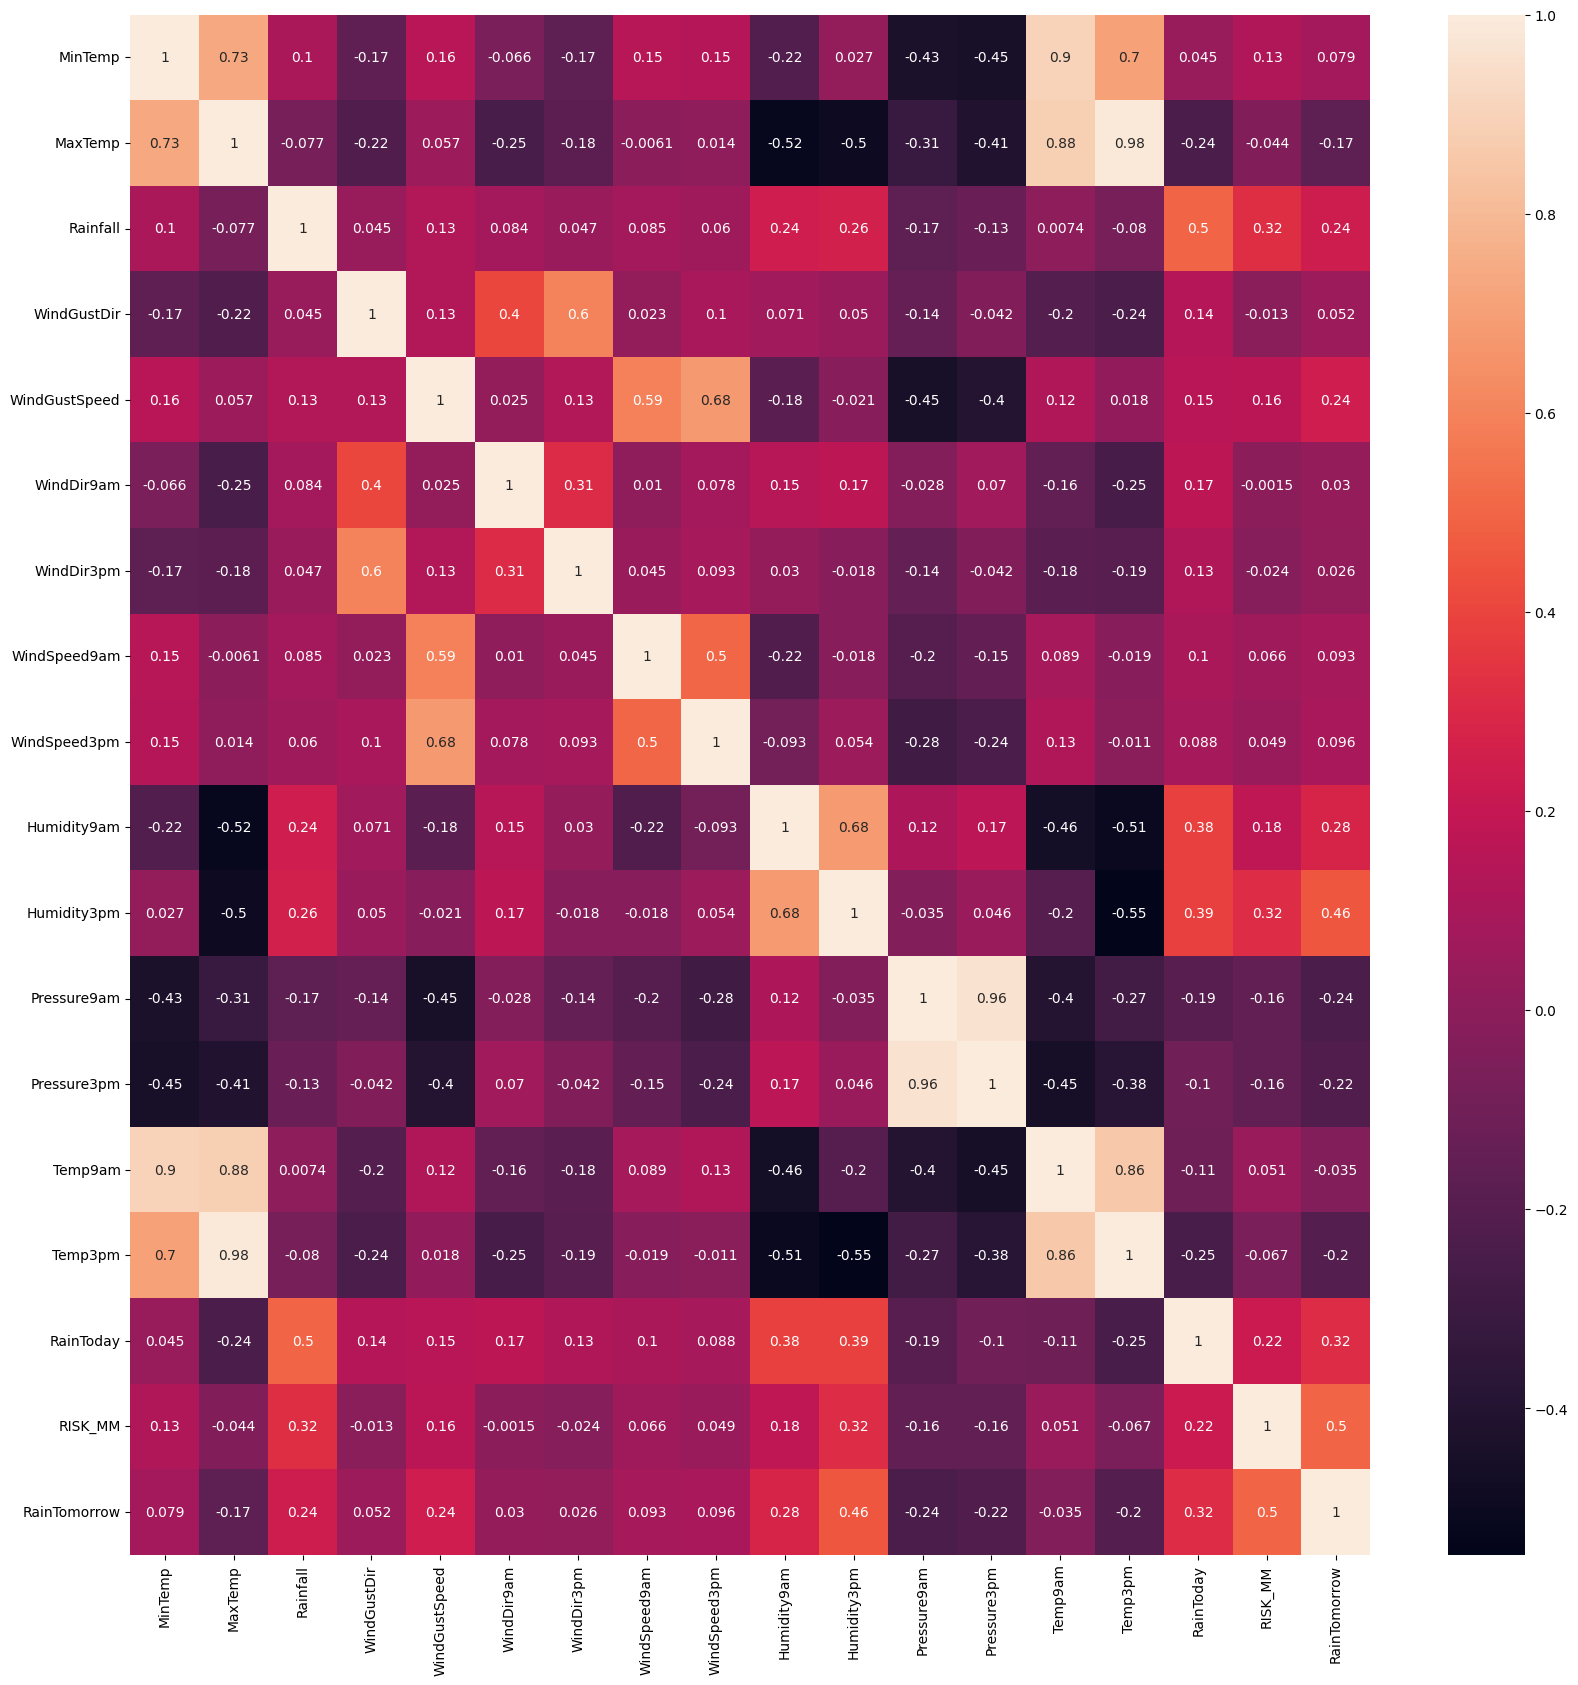

In [ ]:
# Displaying the Correlations among dataset through Heatmap, to compute the pairwise correlation between its columns.
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat, annot=True)

**TRAIN-TEST-SPLIT**

In [ ]:
# Splitting the Dataset into Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**DECISION TREE**

In [ ]:
# Taining the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Finding the Accuracy Score of Testing Data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[17650     0]
 [    0  4935]]
f1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17650
           1       1.00      1.00      1.00      4935

    accuracy                           1.00     22585
   macro avg       1.00      1.00      1.00     22585
weighted avg       1.00      1.00      1.00     22585

Accuracy 1.0


In [ ]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Training Data :  1.0
Accuracy on Test Data :  1.0


**ARTIFICIAL NEURAL NETWORK**

In [ ]:
# Training the Model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model_2 = MLPClassifier()
model_2.fit(X_train, Y_train)

MLPClassifier()

In [ ]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Finding the Accuracy Score of Testing Data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[17650     0]
 [    0  4935]]
f1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17650
           1       1.00      1.00      1.00      4935

    accuracy                           1.00     22585
   macro avg       1.00      1.00      1.00     22585
weighted avg       1.00      1.00      1.00     22585

Accuracy 1.0


In [ ]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  1.0


**RANDOM FOREST CLASSIFIER**

In [ ]:
# Training the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Finding the Accuracy Score of Testing Data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[17650     0]
 [    0  4935]]
f1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17650
           1       1.00      1.00      1.00      4935

    accuracy                           1.00     22585
   macro avg       1.00      1.00      1.00     22585
weighted avg       1.00      1.00      1.00     22585

Accuracy 1.0


In [ ]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  1.0


**XGBOOST CLASSIFIER**

In [ ]:
# Training the Model
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb = xgb.XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Finding the Accuracy score of Training Data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Finding the Accuracy Score of Testing Data

X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[17650     0]
 [    0  4935]]
f1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17650
           1       1.00      1.00      1.00      4935

    accuracy                           1.00     22585
   macro avg       1.00      1.00      1.00     22585
weighted avg       1.00      1.00      1.00     22585

Accuracy 1.0


In [ ]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  1.0
Accuracy on Test Data :  1.0


**BUILDING A PREDICTIVE MODEL**

In [ ]:
input_data = (12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = xgb.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("It will not rain Tomorrow")
else:
    print("It will rain Tomorrow")

[[ 0.03761995  0.29277194 -0.27640495  1.55770511  0.39134523  1.26635166
   1.56864841  0.45789965  0.75750703 -1.55482757 -0.99521374 -1.39718102
  -0.91249673  0.55672435  0.15688743 -0.53828059 -0.27310246]]
[0]
It will not rain Tomorrow
